# 7-11

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


netflix = pd.read_csv('data/netflix_titles.csv')
imdbMovies = pd.read_csv('data/IMDb movies.csv')
imdbratings = pd.read_csv('data/IMDb ratings.csv')

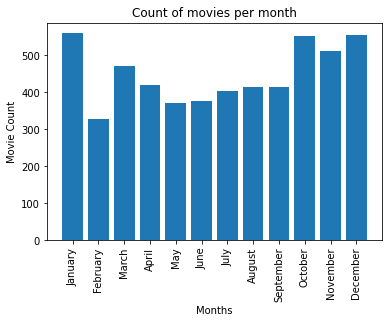

CPU times: user 816 ms, sys: 3.74 ms, total: 820 ms
Wall time: 820 ms


In [17]:
def ex_7():
    df = netflix.dropna(subset=['type', 'date_added', 'show_id'])
    movies = df[df['type'] == "Movie"]
    months = movies.groupby(pd.DatetimeIndex(movies['date_added']).month).agg(count_col=pd.NamedAgg(column='show_id', aggfunc="count"))
    plt.title("Count of movies per month")
    plt.xlabel("Months")
    plt.ylabel("Movie Count")
    positions=(1,2,3,4,5,6,7,8,9,10,11,12)
    labels=("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
    plt.xticks(positions, labels, rotation=90)
    plt.bar(months.index, months['count_col'])
    plt.show()
ex_7()

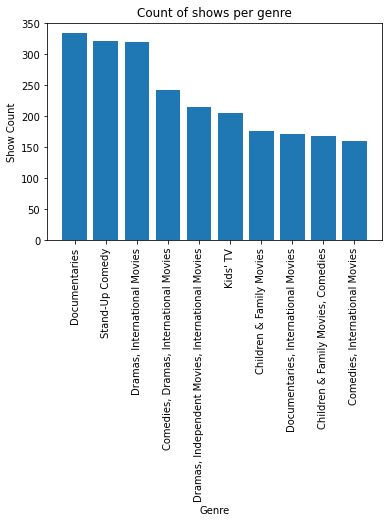

In [18]:
def ex_8(): #TODO: check if genres are correct
    df= netflix.dropna(subset=['listed_in', 'show_id'])
    genre = df.groupby(by=["listed_in"]).agg(count_col=pd.NamedAgg(column='show_id', aggfunc="count"))
    genre= genre.sort_values(by='count_col',ascending=False).head(10)
    plt.title("Count of shows per genre")
    plt.xlabel("Genre")
    plt.ylabel("Show Count") #TODO: show? film?
    plt.xticks(rotation=90)
    plt.bar(genre.index, genre['count_col'])
    plt.show()
ex_8()

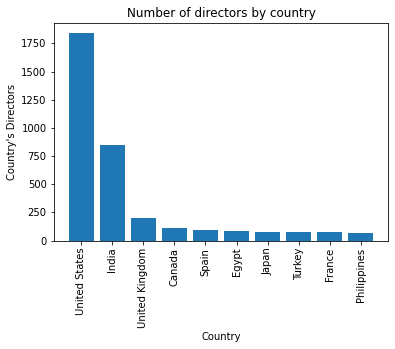

In [19]:
def ex_9_a(n):
    #skino8etes ana xwra, me n prwtoys skino8etes
    df = netflix.dropna(subset=['country', 'director'])
    countries = df.groupby(by=['country']).agg(count_col=pd.NamedAgg(column="director", aggfunc="count"))
    countries = countries.sort_values(by="count_col", ascending=False).head(n)

    plt.title("Number of directors by country")
    plt.xlabel("Country")
    plt.ylabel("Country's Directors")
    plt.xticks(rotation=90)
    plt.bar(countries.index, countries['count_col'])
    plt.show()
ex_9_a(10)

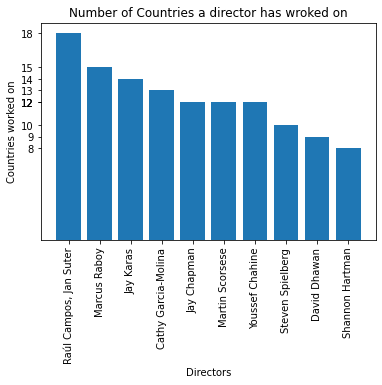

In [20]:
def ex_9_b(n):
    #se poses xwres exei ftiaksei enas skino8eths tainia, me n prwtoyw skino8etes
    df = netflix.dropna(subset=['director', 'country'])
    dirs = df.groupby(by=['director']).agg(count_col=pd.NamedAgg(column="country", aggfunc="count"))
    dirs= dirs.sort_values(by="count_col", ascending=False).head(n)

    plt.title("Number of Countries a director has wroked on")
    plt.xlabel("Directors")
    plt.ylabel("Countries worked on")
    plt.xticks(rotation=90)
    plt.yticks(dirs['count_col'])
    plt.bar(dirs.index, dirs['count_col'])
    plt.show()
ex_9_b(10)

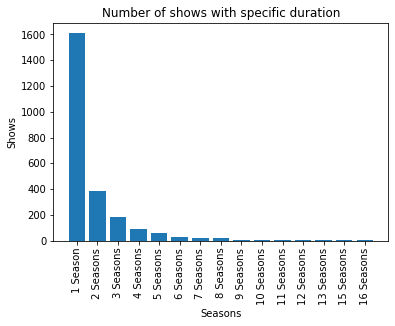

In [21]:
def ex_10():
    df= netflix.dropna(subset=['type', 'duration', 'show_id'])
    shows = df[df['type'] == "TV Show"]
    seasons = shows.groupby(by=['duration']).agg(count_col=pd.NamedAgg(column="show_id", aggfunc="count"))
    seasons = seasons.sort_values(by=['count_col'], ascending=False) #TODO: fix sort

    plt.title("Number of shows with specific duration")
    plt.xlabel("Seasons")
    plt.ylabel("Shows")
    plt.xticks(rotation=90)
    plt.bar(seasons.index, seasons['count_col'])
    plt.show()
ex_10()

In [4]:
def ex_11():
    df_netflix = netflix.dropna(subset=['title', 'release_year', 'director'])
    df_imdbMovies = imdbMovies.dropna(subset=['original_title', 'year', 'director'])
    df_imdbRatings = imdbratings.dropna(subset=['imdb_title_id'])
    merge = pd.merge(df_netflix, df_imdbMovies, how="inner", left_on=["title", "release_year", "director"], right_on=["original_title", "year","director"])
    merge = pd.merge(merge, df_imdbRatings, how="inner", left_on=["imdb_title_id"], right_on=["imdb_title_id"])
    merge = merge.sort_values(['weighted_average_vote'], ascending=False)
    merge = merge[['original_title', 'weighted_average_vote']]
    print(merge.head(10))
ex_11()

                                    original_title  weighted_average_vote
646                               Schindler's List                    8.9
591                                   Pulp Fiction                    8.9
811  The Lord of the Rings: The Return of the King                    8.9
366                                      Inception                    8.8
812          The Lord of the Rings: The Two Towers                    8.7
555                          Oththa Seruppu Size 7                    8.6
428                                        Koshish                    8.6
295                                       Gol Maal                    8.6
63                              American History X                    8.5
765                                   The Departed                    8.5
